# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


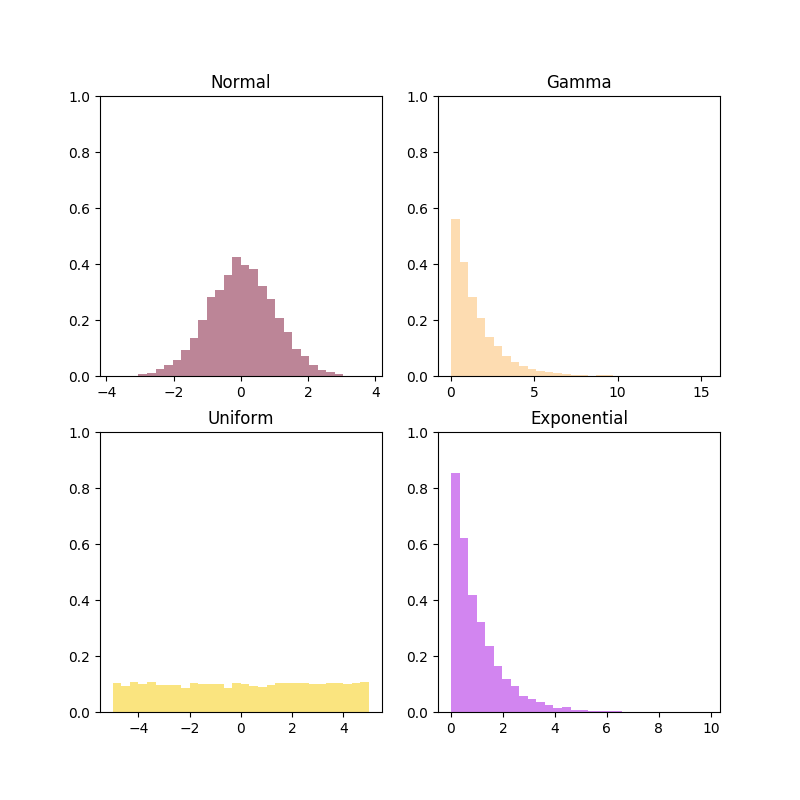

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

import numpy as np


%matplotlib notebook

iterations = 100
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(1, 1.5, 10000)
x3 = np.random.exponential(1, 10000)
x4 = np.random.uniform(-5,5, 10000)

colors = [(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)) for i in range(4)]
fig = plt.figure(figsize=(8,8))

gspec = gridspec.GridSpec(2, 2)    
grid22 = plt.subplot(gspec[1, 1])
grid11 = plt.subplot(gspec[0, 0])
grid12 = plt.subplot(gspec[0, 1])
grid21 = plt.subplot(gspec[1, 0])

# plot the histograms
def update(n):
    if n >= 25:
        a.event_source.stop()
    for ax in fig.get_axes():
        ax.cla()
    grid11.hist(x1[:n**3], normed=True, bins=30, alpha=0.5, color=colors[0])
    grid12.hist(x2[:n**3], normed=True, bins=30, alpha=0.5, color=colors[1])
    grid22.hist(x3[:n**3], normed=True, bins=30, alpha=0.5, color=colors[2])
    grid21.hist(x4[:n**3], normed=True, bins=30, alpha=0.5, color=colors[3])
    for ax in fig.get_axes():
        ax.set_ylim([0,1])
    grid11.set_title("Normal")
    grid12.set_title("Gamma")
    grid22.set_title("Exponential")
    grid21.set_title("Uniform")



a = animation.FuncAnimation(fig, update, interval=5)